# Cocktail Recommender System

## Importing Libraries

In [6]:
# !pip install scikit-surprise
# !pip install matplotlib seaborn
# !pip install --upgrade pandas numpy
# !pip install python-pptx
# !pip install sdv

In [7]:
# import sdv

# print(sdv.version.public)

In [8]:
# url = "https://dachang.github.io/CocktailViz/cocktailWheel.JSON"

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, pairwise
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import PredefinedKFold
from sklearn.metrics.pairwise import cosine_similarity
import hashlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import Dataset, Reader, SVD

import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, NMF

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
# from tensorflow.keras.optimizers import Adam


## Loading the Dataset

In [226]:
# Load the dataset
cocktails_file_path = 'cocktails.csv'
cocktails_df = pd.read_csv(cocktails_file_path)

# Replace all cells with '-' with blank
cocktails_df.replace('-', None, inplace=True)

# Display the first few rows of the updated dataset
print(cocktails_df.columns)
print(cocktails_df.shape)
print(cocktails_df['Base Wine'].unique())
cocktails_df.head()

Index(['Alcohol', 'Name', 'Category', 'Making', 'Base Wine',
       'Base Wine Amount', 'Liquor', 'Liquor Amount', 'Juice', 'Juice Amount',
       'Spice', 'Spice Amount', 'Soda', 'Soda Amount', 'Others', 'Taste',
       'Type of Glass', 'Salty', 'Savory', 'Sour', 'Bitter', 'Sweet', 'Spicy'],
      dtype='object')
(48, 23)
['Tequila' 'Vodka' 'Brandy' 'Rum' 'Whiskey' 'Gin']


,Alcohol,Name,Category,Making,Base Wine,Base Wine Amount,Liquor,Liquor Amount,Juice,Juice Amount,...,Soda Amount,Others,Taste,Type of Glass,Salty,Savory,Sour,Bitter,Sweet,Spicy
0,5,Tequila Sunset,Short,Blend,Tequila,30,None,None,Lemon,30,...,None,Ice,Mild,Champagne Saucer,0,17,83,17,50,0
1,7,Chi-Chi,Long,Shake,Vodka,30,None,None,Pineapple,80,...,None,Coconut Milk,Mild,Armagnac Glasss,0,17,67,0,50,0
2,10,Sex on the Beach,Long,Build,Vodka,15,Melon_20/Raspberry_10,30,Pineapple,80,...,None,None,Mild,Highball,0,0,83,0,50,0
3,10,Horse’s Neck,Long,Build,Brandy,45,None,None,None,None,...,200,Lemon Piece,Mild,Old Fashioned,17,17,83,0,17,0
4,11,EL Diablo,Long,Build,Tequila,30,None,None,None,None,...,250,Orange Piece,Mild,Highball,17,0,50,17,50,0


## Exploratory Data Analysis

In [227]:
# # EDA on cocktails data
# def eda_cocktails(data):
#     print("Cocktails Data Info:")
#     print(data.info())
#     # Summary Statistics
#     print("\nCocktails Data Description:")
#     print(data.describe())

#     for column in data.columns:
#         plt.figure(figsize=(12, 6))
        
#         if data[column].dtype == 'object':
#             # Categorical column - Bar plot
#             data[column].value_counts().plot(kind='bar')
#             plt.title(f'Distribution of {column}')
#             plt.xlabel(column)
#             plt.ylabel('Frequency')
#         else:
#             # Numerical column - Scatter plot
#             plt.scatter(data.index, data[column])
#             plt.title(f'Scatter plot of {column}')
#             plt.xlabel('Index')
#             plt.ylabel(column)
        
#         plt.show()

# # Perform EDA
# eda_cocktails(cocktails_data)

In [228]:
### Correlation Analysis

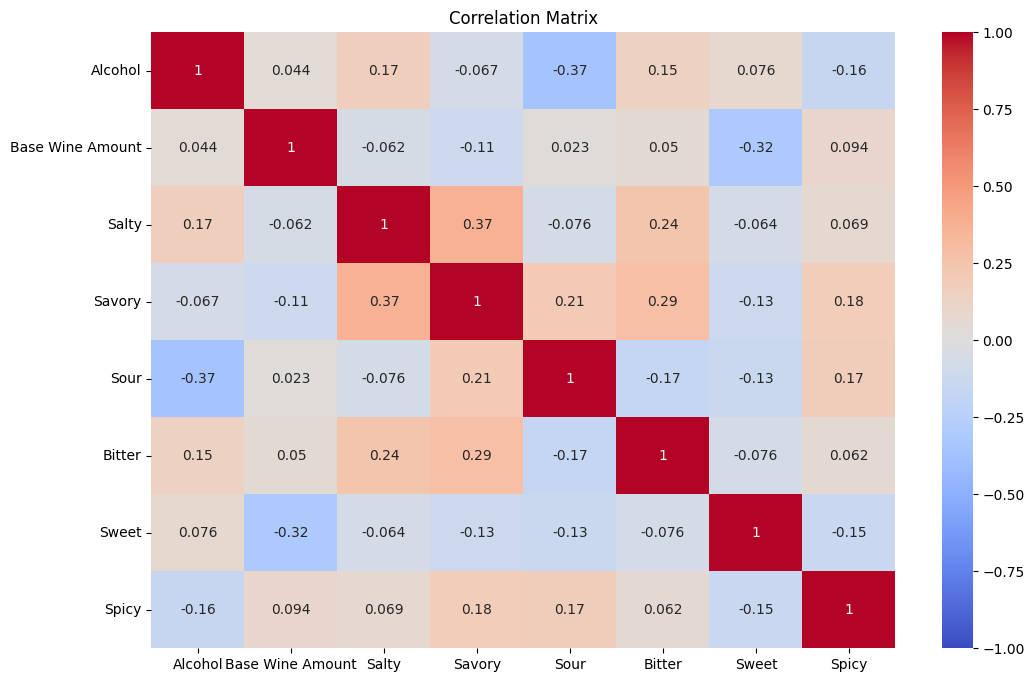

In [229]:
# Plot correlation matrix
# Select only numerical columns
numerical_cols = cocktails_df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns
corr_matrix = numerical_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Handle Missing Values

In [230]:
# Since the cocktails recipes are set there would not be a case to fill in missing values. If the data was truly missing then we would be an associate to fill in the correct information

### Feature Scaling

In [231]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
numerical_cols = cocktails_df.select_dtypes(include=['number']).columns
print(numerical_cols)
scaler = StandardScaler()
cocktails_df[numerical_cols] = scaler.fit_transform(cocktails_df[numerical_cols])

cocktails_df.head()

Index(['Alcohol', 'Base Wine Amount', 'Salty', 'Savory', 'Sour', 'Bitter',
       'Sweet', 'Spicy'],
      dtype='object')


,Alcohol,Name,Category,Making,Base Wine,Base Wine Amount,Liquor,Liquor Amount,Juice,Juice Amount,...,Soda Amount,Others,Taste,Type of Glass,Salty,Savory,Sour,Bitter,Sweet,Spicy
0,-1.901512,Tequila Sunset,Short,Blend,Tequila,-1.002448,None,None,Lemon,30,...,None,Ice,Mild,Champagne Saucer,-0.648430,1.235442,1.196735,0.427160,0.462927,-0.145865
1,-1.678624,Chi-Chi,Long,Shake,Vodka,-1.002448,None,None,Pineapple,80,...,None,Coconut Milk,Mild,Armagnac Glasss,-0.648430,1.235442,0.686695,-0.844967,0.462927,-0.145865
2,-1.344292,Sex on the Beach,Long,Build,Vodka,-2.650309,Melon_20/Raspberry_10,30,Pineapple,80,...,None,None,Mild,Highball,-0.648430,-0.809427,1.196735,-0.844967,0.462927,-0.145865
3,-1.344292,Horse’s Neck,Long,Build,Brandy,0.645412,None,None,None,None,...,200,Lemon Piece,Mild,Old Fashioned,0.472585,1.235442,1.196735,-0.844967,-1.012479,-0.145865
4,-1.232848,EL Diablo,Long,Build,Tequila,-1.002448,None,None,None,None,...,250,Orange Piece,Mild,Highball,0.472585,-0.809427,0.144777,0.427160,0.462927,-0.145865


In [232]:
cocktails_df['Name'].unique()

array(['Tequila Sunset', 'Chi-Chi', 'Sex on the Beach', 'Horse’s Neck',
       'EL Diablo', 'Bloody Mary', 'Moscow Mule', 'Cuba Libre',
       'Tequila Sunrise', 'Harvard Cooler', 'Salty Dog', 'John Collins',
       'Gin & Tonic', 'Vodka & Tonic', 'Blue Hawaii', 'Screwdriver',
       'Tom Collins', 'Singapore Sling', 'Havana Beach', 'Imperial Fizz',
       'Long Island Ice Tea', 'Zombie', 'Cosmopolitan', 'Negroni',
       'Mai-Tai', 'Mojito', 'Silk Stockings', 'Mockingbird', 'Margarita',
       'New York', 'Sidecar', 'Gin Fizz', 'Miami Beach', 'Cherry Blossom',
       'Vodka Gimlet', 'Brooklyn', 'Martini Sweet', 'Black Russian',
       'Brave Bull', 'Old Fashioned', 'Manhattan', 'Dirty Mother',
       'Stinger', 'French Connection', 'Martini', 'Godfather',
       'Tequila Martini', 'Earthquake'], dtype=object)

### One-Hot Encode Categorical Variables

In [233]:
# One-Hot Encode categorical columns, except the cocktail name column
categorical_cols = cocktails_df.drop(columns='Name').select_dtypes(include=['object']).columns
print(categorical_cols)
cocktails_df = pd.get_dummies(cocktails_df, columns=categorical_cols)

# Convert boolean columns to integers
boolean_cols = cocktails_df.select_dtypes(include=['bool']).columns
cocktails_df[boolean_cols] = cocktails_df[boolean_cols].astype(int)

Index(['Category', 'Making', 'Base Wine', 'Liquor', 'Liquor Amount', 'Juice',
       'Juice Amount', 'Spice', 'Spice Amount', 'Soda', 'Soda Amount',
       'Others', 'Taste', 'Type of Glass'],
      dtype='object')


In [234]:
# Add a new column 'cocktail_id' with ascending numerical mapping
cocktails_df['cocktail_id'] = range(1, len(cocktails_df) + 1)

cocktails_df.head()

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1106900956.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cocktails_df['cocktail_id'] = range(1, len(cocktails_df) + 1)


,Alcohol,Name,Base Wine Amount,Salty,Savory,Sour,Bitter,Sweet,Spicy,Category_Long,...,Type of Glass_Champagne Flute,Type of Glass_Champagne Saucer,Type of Glass_Cognac Ballon,Type of Glass_Cordial Glass,Type of Glass_Highball,Type of Glass_Martini Glass,Type of Glass_Old Fashioned,Type of Glass_Rock,Type of Glass_Shot Glass,cocktail_id
0,-1.901512,Tequila Sunset,-1.002448,-0.648430,1.235442,1.196735,0.427160,0.462927,-0.145865,0,...,0,1,0,0,0,0,0,0,0,1
1,-1.678624,Chi-Chi,-1.002448,-0.648430,1.235442,0.686695,-0.844967,0.462927,-0.145865,1,...,0,0,0,0,0,0,0,0,0,2
2,-1.344292,Sex on the Beach,-2.650309,-0.648430,-0.809427,1.196735,-0.844967,0.462927,-0.145865,1,...,0,0,0,0,1,0,0,0,0,3
3,-1.344292,Horse’s Neck,0.645412,0.472585,1.235442,1.196735,-0.844967,-1.012479,-0.145865,1,...,0,0,0,0,0,0,1,0,0,4
4,-1.232848,EL Diablo,-1.002448,0.472585,-0.809427,0.144777,0.427160,0.462927,-0.145865,1,...,0,0,0,0,1,0,0,0,0,5


In [235]:
cocktails_df.columns

Index(['Alcohol', 'Name', 'Base Wine Amount', 'Salty', 'Savory', 'Sour',
       'Bitter', 'Sweet', 'Spicy', 'Category_Long',
       ...
       'Type of Glass_Champagne Flute', 'Type of Glass_Champagne Saucer',
       'Type of Glass_Cognac Ballon', 'Type of Glass_Cordial Glass',
       'Type of Glass_Highball', 'Type of Glass_Martini Glass',
       'Type of Glass_Old Fashioned', 'Type of Glass_Rock',
       'Type of Glass_Shot Glass', 'cocktail_id'],
      dtype='object', length=119)

In [236]:
### Correlation Analysis

In [237]:
# # Plot correlation matrix
# plt.figure(figsize=(12, 8))
# corr_matrix = cocktails_df.drop(columns = 'Name').corr()
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.show()

## Importing User Ratings

In [238]:
# Importing Ratings Data Raw

# Assuming 'cocktails_df' is predefined with cocktail names
cocktail_ids = cocktails_df.set_index('Name')['cocktail_id'].to_dict()

# Load the CSV file
file_path = 'user_ratings_form.csv'
ratings_df = pd.read_csv(file_path)
print(ratings_df.columns)
print(ratings_df.shape)

# Ensure necessary columns are present
assert 'Name' in cocktails_df.columns, "'Name' column missing in cocktails_df"
assert 'Email' in ratings_df.columns, "'Email' column missing in ratings_df"
assert 'Cocktail' in ratings_df.columns, "'Cocktail' column missing in ratings_df"
assert 'Rating (1=do not like, 5 = like very much)' in ratings_df.columns, "'Rating' column missing in ratings_df"

ratings_df['user_id'] = ratings_df['Email'].factorize()[0]
ratings_df.rename(columns={'Rating (1=do not like, 5 = like very much)': 'user_rating'}, inplace=True)

# Check the number of unique users in ratings_df
num_unique_users = ratings_df['user_id'].nunique()
print(f"Number of unique users: {num_unique_users}")
print(ratings_df['Email'].unique())

ratings_df['cocktail_id'] = ratings_df['Cocktail'].map(cocktail_ids)
ratings_df = ratings_df[['user_id', 'cocktail_id', 'user_rating']]

print(ratings_df)

Index(['Timestamp', 'Email', 'Your Name', 'Cocktail',
       'Rating (1=do not like, 5 = like very much)'],
      dtype='object')
(115, 5)
Number of unique users: 48
['mgoodman4@uchicago.edu' 'veldman@uchicago.edu' 'fmofidi@uchicago.edu '
 'fmofidi@uchicago.edu' 'aayushv2002@uchicago.edu' 'mpatel1528@gmail.com'
 'Lpenac@uchicago.edu' 'Patel.dipali.820@gmail.com'
 'natasha.thakkar@gmail.com' 'thomascal@uchicago.edu'
 'Jthakkar23@gmail.com' 'Sparikh516@gmail.com'
 'Raj.ashok.contractor@gmail.com' 'kwaku@uchicago.edu'
 'sglenno@uchicago.edu' 'kwaku.oforiatta@gmail.com'
 'niharrp9@uchicago.edu' 'cpiantanida@uchicago.edu'
 'benthiele@uchicago.edu' 'apatel9514@gmail.com' 'nrickert@uchicago.edu'
 'Rmehta30@gmail.com' 'miraj.chokshi@gmail.com' 'komatsu.tim@gmail.com'
 'Dharati90@gmail.com' 'Pskulkarni@uchicago.edu'
 'Thomas.seagraves@gmail.com' 'delms08@gmail.com' 'klebanhailey@gmail.com'
 'Ashishkabob1201@gmail.com' 'Emilylewandowski81@gmail.com'
 'Emilylewandowski81@gmail' 'j.c.lewandowski19

## Model Building

In [265]:
# Function to create item-based collaborative filtering recommendations
def item_based_recommender(ratings_df, cocktails_df, num_users, num_recommendations, export_filename):
    user_item_matrix = ratings_df.pivot_table(index='user_id', columns='cocktail_id', values='user_rating')
    user_item_matrix = user_item_matrix.fillna(0)
    item_similarity = cosine_similarity(user_item_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
    
    recommendations = {}
    actual_num_users = user_item_matrix.shape[0]
    for user in range(min(num_users, actual_num_users)):
        user_ratings = user_item_matrix.iloc[user, :]
        user_recommendations = user_ratings.dot(item_similarity_df) / item_similarity_df.sum(axis=1)
        user_recommendations = user_recommendations.sort_values(ascending=False)
        recommendations[user] = user_recommendations.index[:num_recommendations].tolist()
    
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
    recommendations_df.to_csv(export_filename + '_item_based.csv', index_label='user_id')
    return recommendations_df

# Function to create user-based collaborative filtering recommendations
def user_based_recommender(ratings_df, cocktails_df, num_users, num_neighbors, num_recommendations, export_filename):
    user_item_matrix = ratings_df.pivot_table(index='user_id', columns='cocktail_id', values='user_rating')
    user_item_matrix = user_item_matrix.fillna(0)
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
    
    recommendations = {}
    actual_num_users = user_item_matrix.shape[0]
    for user in range(min(num_users, actual_num_users)):
        user_similarities = user_similarity_df.iloc[user, :]
        similar_users = user_similarities.sort_values(ascending=False).index[1:num_neighbors+1]
        similar_users_ratings = user_item_matrix.loc[similar_users, :]
        user_recommendations = similar_users_ratings.T.dot(user_similarities[similar_users]) / user_similarities[similar_users].sum()
        user_recommendations = user_recommendations.sort_values(ascending=False)
        recommendations[user] = user_recommendations.index[:num_recommendations].tolist()
    
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
    recommendations_df.to_csv(export_filename + '_user_based.csv', index_label='user_id')
    return recommendations_df

# Function to create content-based filtering recommendations
def content_based_recommender(ratings_df, cocktails_df, num_users, num_recommendations, export_filename):
    cocktail_features = cocktails_df.apply(lambda x: ' '.join(x.astype(str)), axis=1)
    vectorizer = CountVectorizer().fit_transform(cocktail_features)
    cocktail_vectors = vectorizer.toarray()
    content_similarity = cosine_similarity(cocktail_vectors)
    content_similarity_df = pd.DataFrame(content_similarity, index=cocktails_df['cocktail_id'], columns=cocktails_df['cocktail_id'])
    
    recommendations = {}
    user_item_matrix = ratings_df.pivot_table(index='user_id', columns='cocktail_id', values='user_rating').fillna(0)
    actual_num_users = user_item_matrix.shape[0]
    for user in range(min(num_users, actual_num_users)):
        user_ratings = user_item_matrix.iloc[user, :]
        user_rated_cocktails = user_ratings[user_ratings > 0].index
        user_recommendations = pd.Series(dtype='float64')
        for cocktail in user_rated_cocktails:
            similar_cocktails = content_similarity_df[cocktail].sort_values(ascending=False).iloc[1:num_recommendations+1]
            similar_cocktails = pd.Series(similar_cocktails.index)
            if not similar_cocktails.empty:
                user_recommendations = pd.concat([user_recommendations, similar_cocktails])
        user_recommendations = user_recommendations.value_counts().sort_values(ascending=False)
        recommendations[user] = user_recommendations.index[:num_recommendations].tolist()
    
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
    recommendations_df.to_csv(export_filename + '_content_based.csv', index_label='user_id')
    return recommendations_df

# Function to create SVD-based collaborative filtering recommendations
def svd_recommender(ratings_df, cocktails_df, num_users, num_recommendations, export_filename):
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(ratings_df[['user_id', 'cocktail_id', 'user_rating']], reader)
    
    # Train-test split using surprise's built-in function
    trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
    
    # Train the SVD algorithm
    algo = SVD()
    algo.fit(trainset)
    
    recommendations = {}
    actual_num_users = len(ratings_df['user_id'].unique())
    for user in range(min(num_users, actual_num_users)):
        user_ratings = ratings_df[ratings_df['user_id'] == str(user + 1)]
        user_cocktail_ids = user_ratings['cocktail_id'].tolist()
        user_recommendations = []
        for cocktail_id in cocktails_df['cocktail_id']:
            if cocktail_id not in user_cocktail_ids:
                prediction = algo.predict(str(user + 1), cocktail_id)
                user_recommendations.append((cocktail_id, prediction.est))
        user_recommendations.sort(key=lambda x: x[1], reverse=True)
        recommendations[user] = [cocktail_id for cocktail_id, _ in user_recommendations[:num_recommendations]]
    
    recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
    recommendations_df.to_csv(export_filename + '_svd.csv', index_label='user_id')
    return recommendations_df

# # Example usage
# ratings_df = pd.DataFrame({'user_id': [1, 2, 1, 2], 'cocktail_id': [1, 1, 2, 2], 'user_rating': [5, 3, 4, 2]})
# cocktails_df = pd.DataFrame({'cocktail_id': [1, 2], 'Name': ['Margarita', 'Martini'], 'Alcohol': [True, True], 'Salty': [False, False], 'Savory': [False, False], 'Sour': [True, False], 'Bitter': [False, True], 'Sweet': [True, False], 'Spicy': [False, False]})

num_users = 2
num_neighbors = 10
num_recommendations = 3
export_filename = 'recommendations'

item_based_recommendations = item_based_recommender(ratings_df, cocktails_df, num_users, num_recommendations, 'recs/item_based_recommendations')
user_based_recommendations = user_based_recommender(ratings_df, cocktails_df, num_users, num_neighbors, num_recommendations, 'recs/user_based_recommendations')
content_based_recommendations = content_based_recommender(ratings_df, cocktails_df, num_users, num_recommendations, 'recs/content_based_recommendations')
svd_recommendations = svd_recommender(ratings_df, cocktails_df, num_users, num_recommendations, 'recs/svd_recommendations')


/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1161031978.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  user_recommendations = pd.concat([user_recommendations, similar_cocktails])
/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1161031978.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  user_recommendations = pd.concat([user_recommendations, similar_cocktails])


TypeError: 'Trainset' object is not subscriptable

<Figure size 1200x500 with 0 Axes>

## Synthetic User Rating

In [255]:


# Generate synthetic user ratings data
def generate_synthetic_ratings(num_users, num_ratings, cocktails_df):
    np.random.seed(42)
    user_ids = pd.Series(np.random.randint(1, num_users + 1, num_ratings)).astype(str)
    cocktail_names = np.random.choice(cocktails_df['Name'].unique(), num_ratings)
    user_ratings = np.random.normal(loc=3, scale=1, size=num_ratings).astype(int)
    user_ratings = np.clip(user_ratings, 1, 5)
    
    cocktail_ids = cocktails_df.set_index('Name')['cocktail_id'].to_dict()
    
    synthetic_data = pd.DataFrame({
        'user_id': user_ids,
        'cocktail_name': cocktail_names,
        'user_rating': user_ratings
    })
    
    synthetic_data['cocktail_id'] = synthetic_data['cocktail_name'].map(cocktail_ids)
    synthetic_data['user_email'] = synthetic_data['user_id'].apply(lambda x: f'user{x}@gmail.com')
    
    return synthetic_data

num_users = 2000  # Number of unique users
num_ratings = 10000  # Total number of ratings

# Generate the data once
syn_ratings_df = generate_synthetic_ratings(num_users, num_ratings, cocktails_df)

# Ensure cocktail_id is integer
syn_ratings_df['cocktail_id'] = syn_ratings_df['cocktail_id'].astype(int)

syn_ratings_df.to_csv('syn_user_rating_test.csv', index=False)

syn_ratings_df2 = syn_ratings_df[['user_id', 'cocktail_id', 'user_rating']]


In [ ]:
syn_item_based_recommendations = item_based_recommender(syn_ratings_df2, cocktails_df, num_users, num_recommendations, 'recs/syn_item_based_recommendations')
syn_user_based_recommendations = user_based_recommender(syn_ratings_df2, cocktails_df, num_users, num_neighbors, num_recommendations, 'recs/syn_user_based_recommendations')
syn_content_based_recommendations = content_based_recommender(syn_ratings_df2, cocktails_df, num_users, num_recommendations, 'recs/syn_content_based_recommendations')
syn_svd_recommendations = svd_recommender(syn_ratings_df2, cocktails_df, num_users, num_recommendations, 'recs/syn_svd_recommendations')

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3212488270.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  user_recommendations = pd.concat([user_recommendations, similar_cocktails])
/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3212488270.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  user_recommendations = pd.concat([user_recommendations, similar_cocktails])
/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3212488270.py:60: FutureWarning: The behavior of array concatenation with empty entri

In [273]:
# Function to plot the distribution of ratings
def plot_rating_distribution(df, title):
    plt.figure(figsize=(12, 5))
    rating_counts = df['user_rating'].value_counts().sort_index()
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Function to plot the distribution of cocktails
def plot_cocktail_distribution(df, title):
    plt.figure(figsize=(12, 5))
    cocktail_counts = df['cocktail_id'].value_counts().sort_index()
    sns.barplot(x=cocktail_counts.index, y=cocktail_counts.values, palette='viridis')
    plt.xlabel('Cocktail ID')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1939670771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


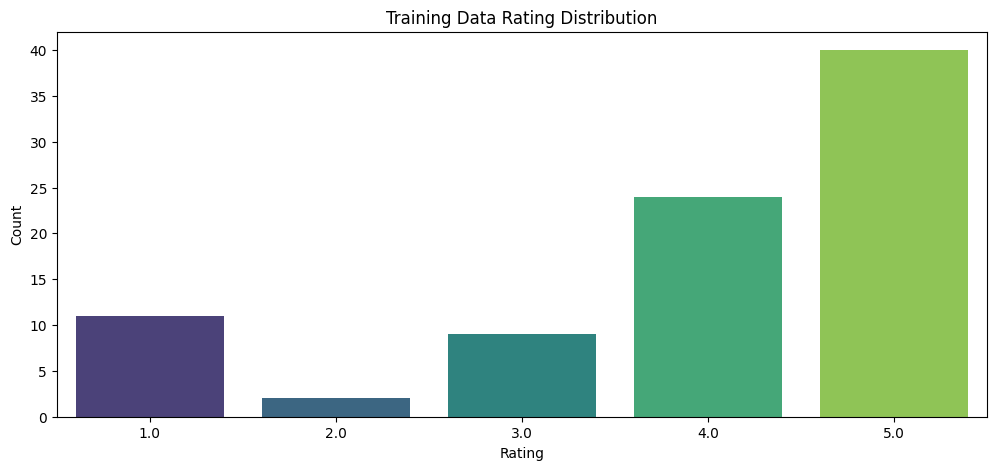

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1939670771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


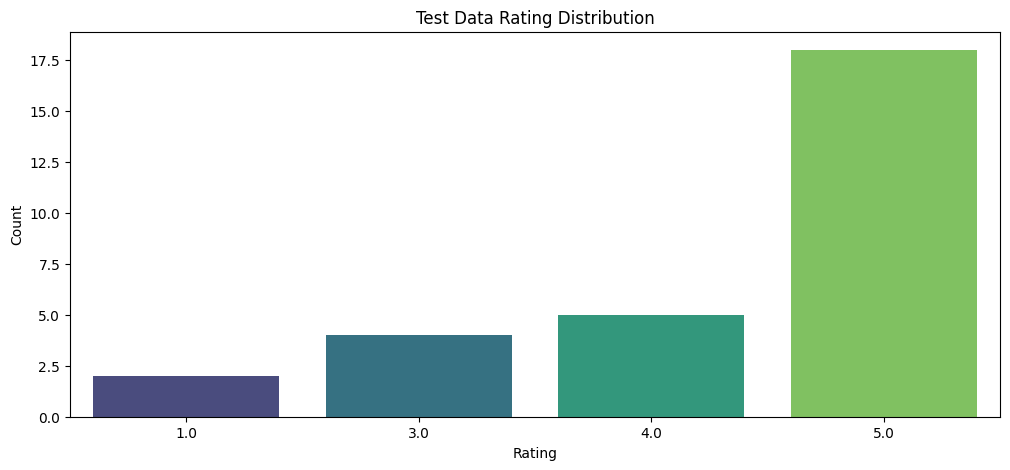

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1294538234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cocktail_counts.index, y=cocktail_counts.values, palette='viridis')


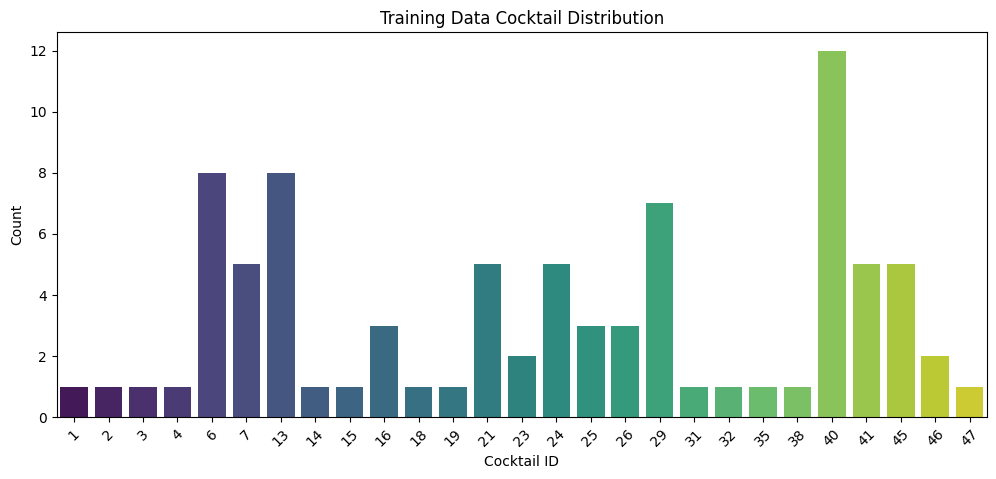

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1294538234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cocktail_counts.index, y=cocktail_counts.values, palette='viridis')


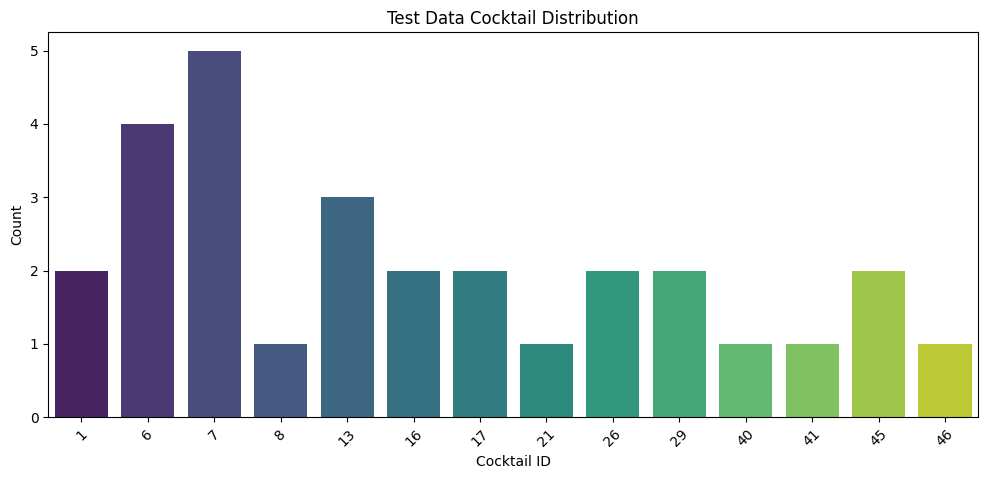

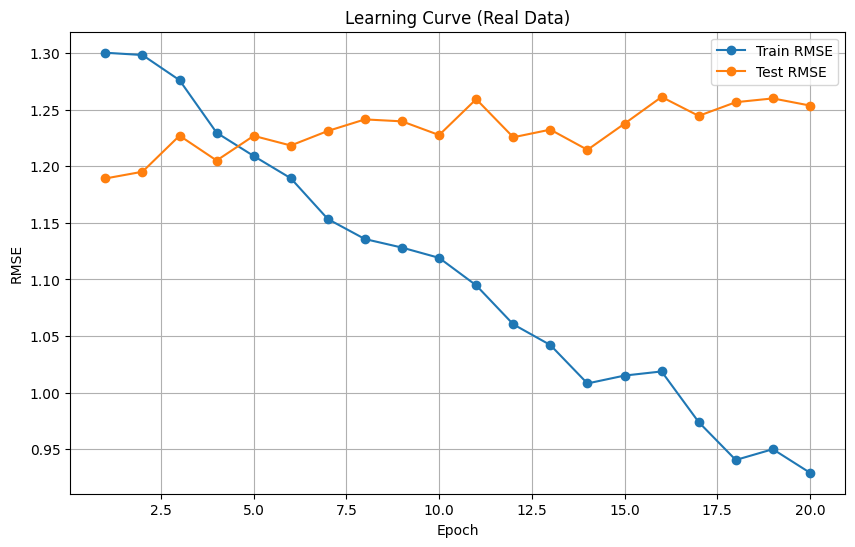

In [275]:
# Prepare the data for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df, reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Convert the trainset and testset to DataFrames for plotting
train_df = pd.DataFrame(trainset.build_testset(), columns=['user_id', 'cocktail_id', 'user_rating'])
test_df = pd.DataFrame(testset, columns=['user_id', 'cocktail_id', 'user_rating'])

# Plot the distribution of ratings
plot_rating_distribution(train_df, 'Training Data Rating Distribution')
plot_rating_distribution(test_df, 'Test Data Rating Distribution')

plot_cocktail_distribution(train_df, 'Training Data Cocktail Distribution')
plot_cocktail_distribution(test_df, 'Test Data Cocktail Distribution')

# Function to calculate RMSE for train and test sets
def calculate_rmse(trainset, testset, n_epochs=20):
    train_rmse = []
    test_rmse = []
    
    for epoch in range(1, n_epochs + 1):
        algo = SVD(n_epochs=epoch)
        algo.fit(trainset)
        
        train_predictions = algo.test(trainset.build_testset())
        test_predictions = algo.test(testset)
        
        train_rmse.append(accuracy.rmse(train_predictions, verbose=False))
        test_rmse.append(accuracy.rmse(test_predictions, verbose=False))
    
    return train_rmse, test_rmse

# Calculate RMSE for 20 epochs
n_epochs = 20
train_rmse, test_rmse = calculate_rmse(trainset, testset, n_epochs)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_rmse, marker='o', label='Train RMSE')
plt.plot(range(1, n_epochs + 1), test_rmse, marker='o', label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve (Real Data)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1939670771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


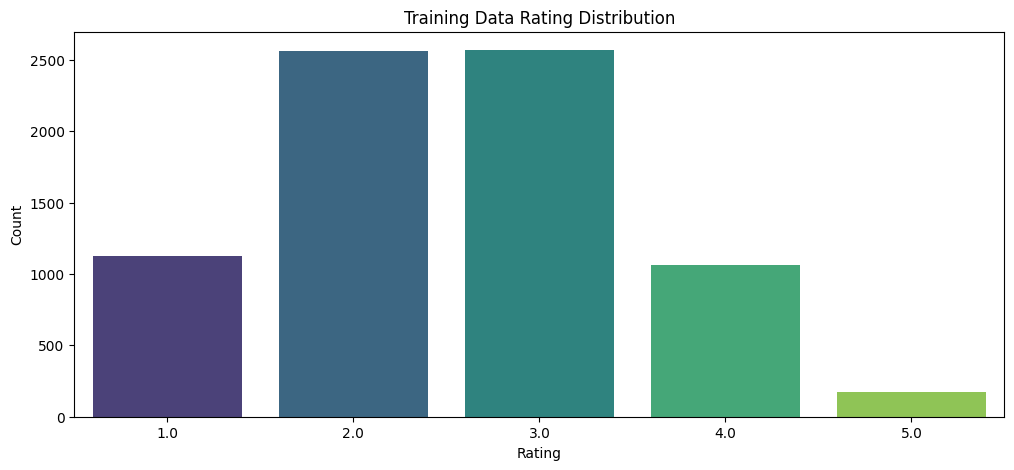

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1939670771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


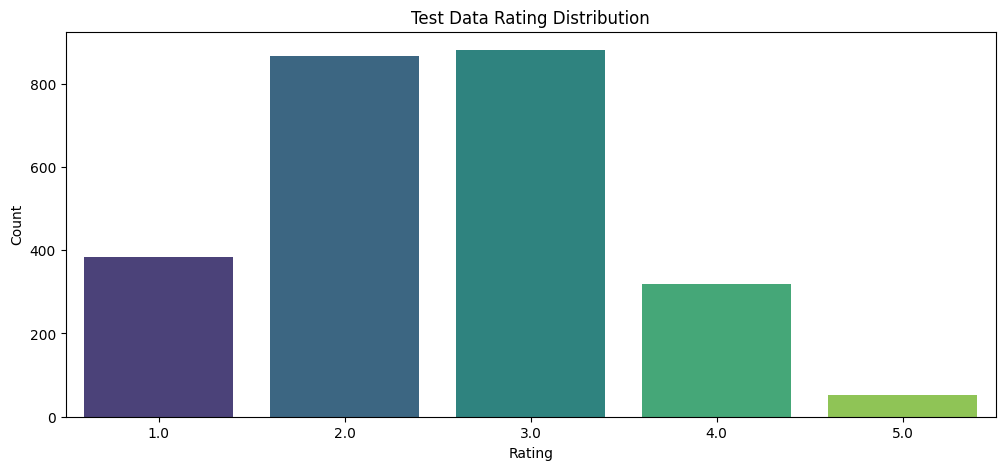

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1294538234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cocktail_counts.index, y=cocktail_counts.values, palette='viridis')


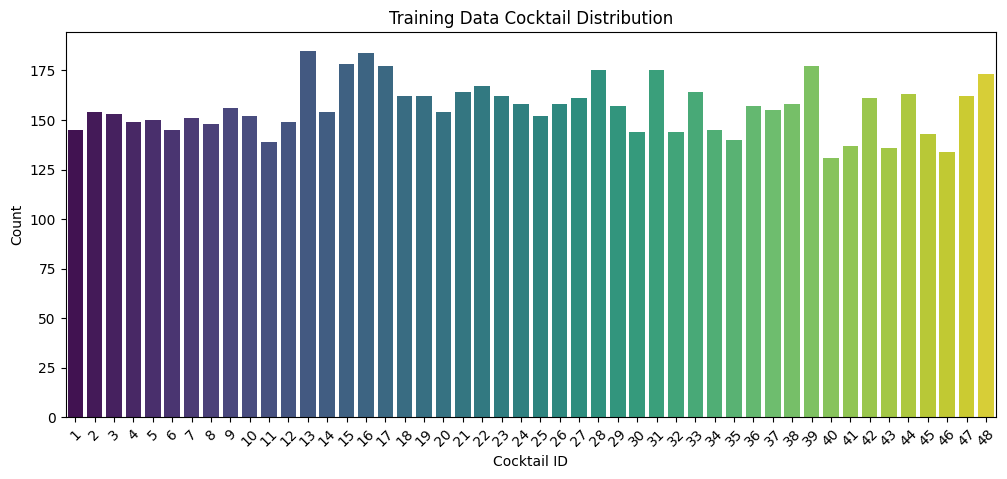

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/1294538234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cocktail_counts.index, y=cocktail_counts.values, palette='viridis')


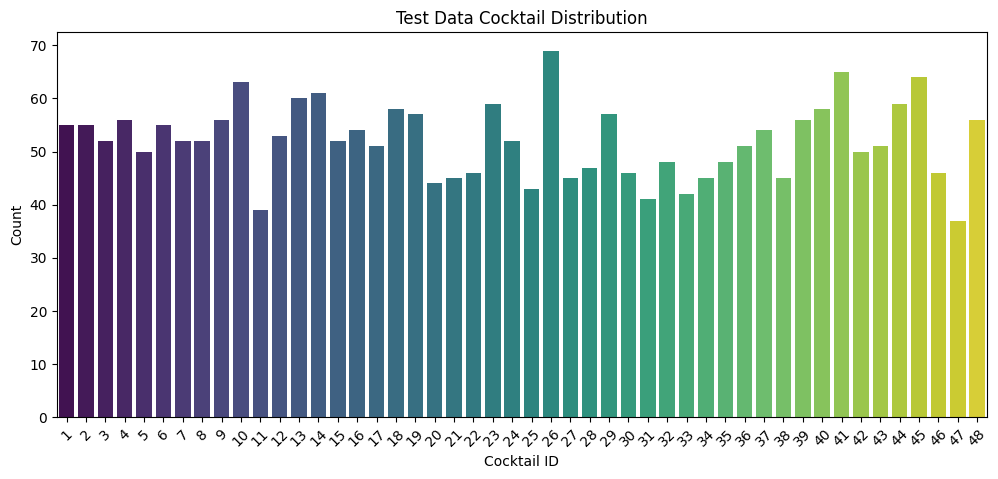

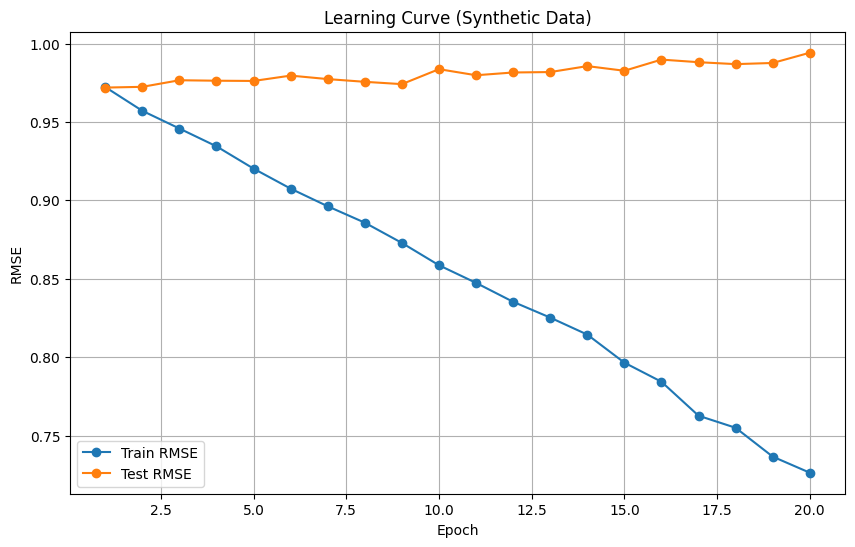

In [276]:
# Prepare the data for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(syn_ratings_df2, reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Convert the trainset and testset to DataFrames for plotting
train_df = pd.DataFrame(trainset.build_testset(), columns=['user_id', 'cocktail_id', 'user_rating'])
test_df = pd.DataFrame(testset, columns=['user_id', 'cocktail_id', 'user_rating'])

# Plot the distribution of ratings
plot_rating_distribution(train_df, 'Training Data Rating Distribution')
plot_rating_distribution(test_df, 'Test Data Rating Distribution')

plot_cocktail_distribution(train_df, 'Training Data Cocktail Distribution')
plot_cocktail_distribution(test_df, 'Test Data Cocktail Distribution')

# Function to calculate RMSE for train and test sets
def calculate_rmse(trainset, testset, n_epochs=20):
    train_rmse = []
    test_rmse = []
    
    for epoch in range(1, n_epochs + 1):
        algo = SVD(n_epochs=epoch)
        algo.fit(trainset)
        
        train_predictions = algo.test(trainset.build_testset())
        test_predictions = algo.test(testset)
        
        train_rmse.append(accuracy.rmse(train_predictions, verbose=False))
        test_rmse.append(accuracy.rmse(test_predictions, verbose=False))
    
    return train_rmse, test_rmse

# Calculate RMSE for 20 epochs
n_epochs = 20
train_rmse, test_rmse = calculate_rmse(trainset, testset, n_epochs)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_rmse, marker='o', label='Train RMSE')
plt.plot(range(1, n_epochs + 1), test_rmse, marker='o', label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve (Synthetic Data)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3256207224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


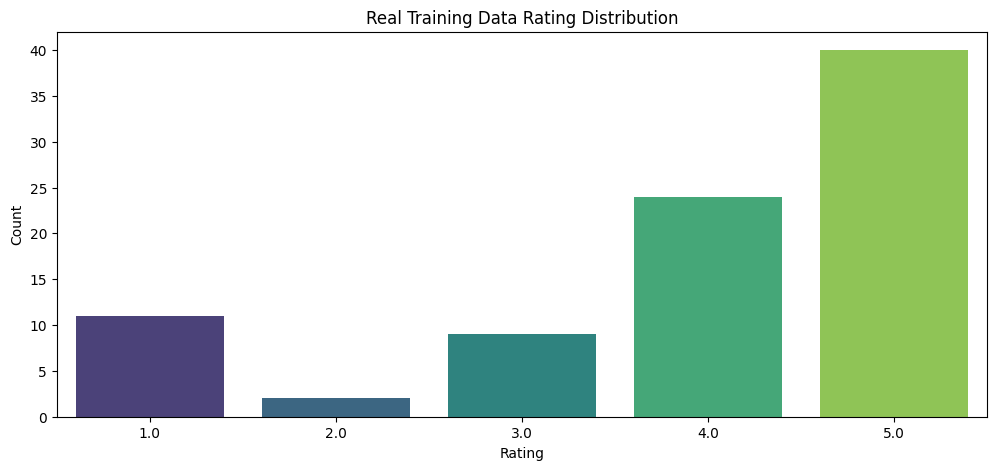

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3256207224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


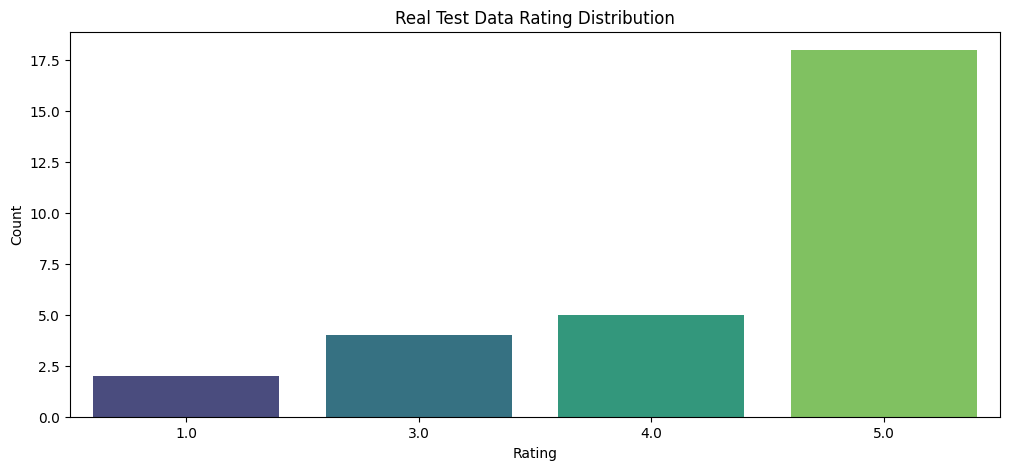

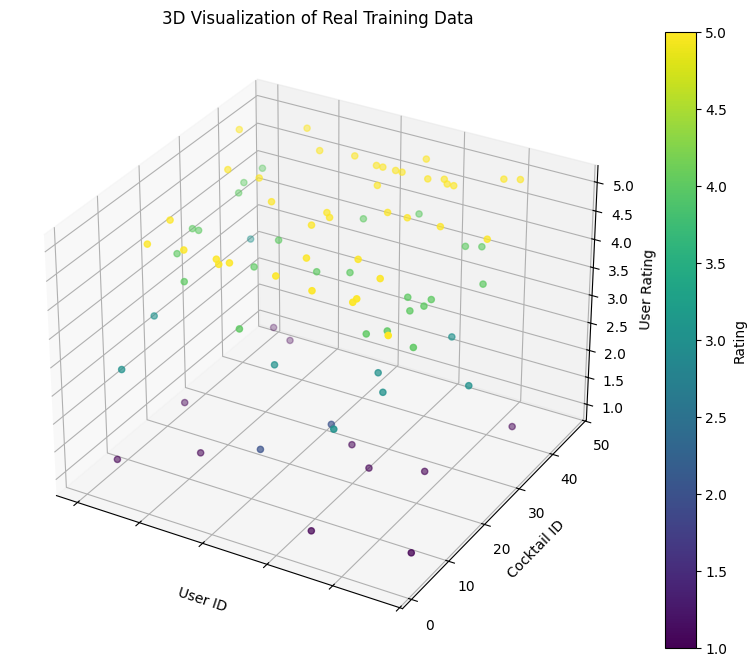

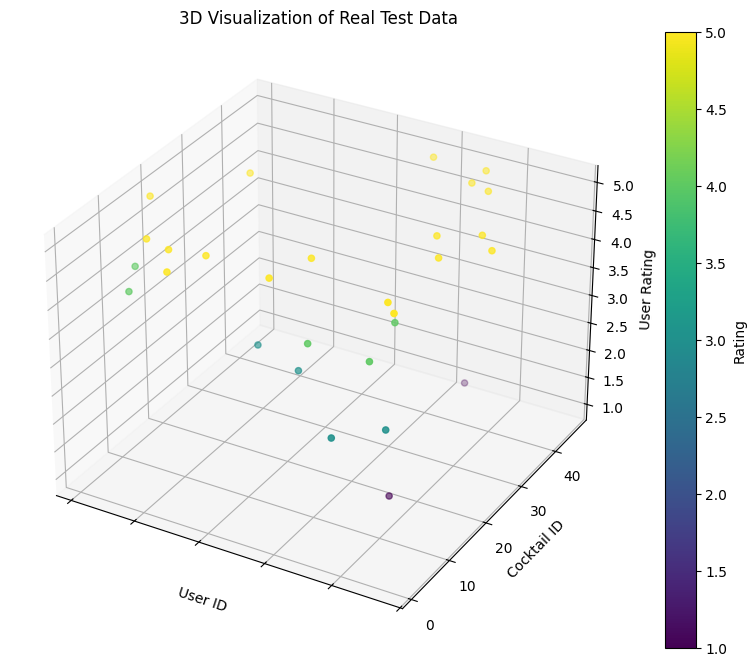

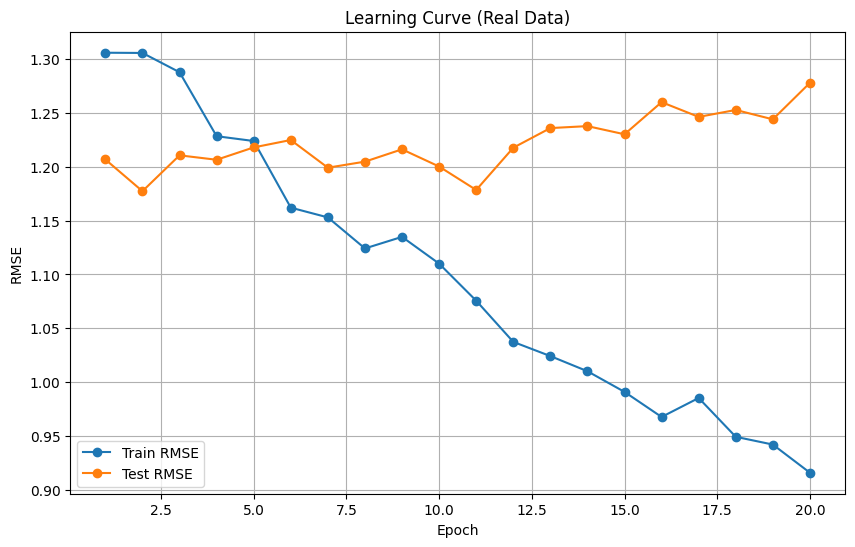

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3256207224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


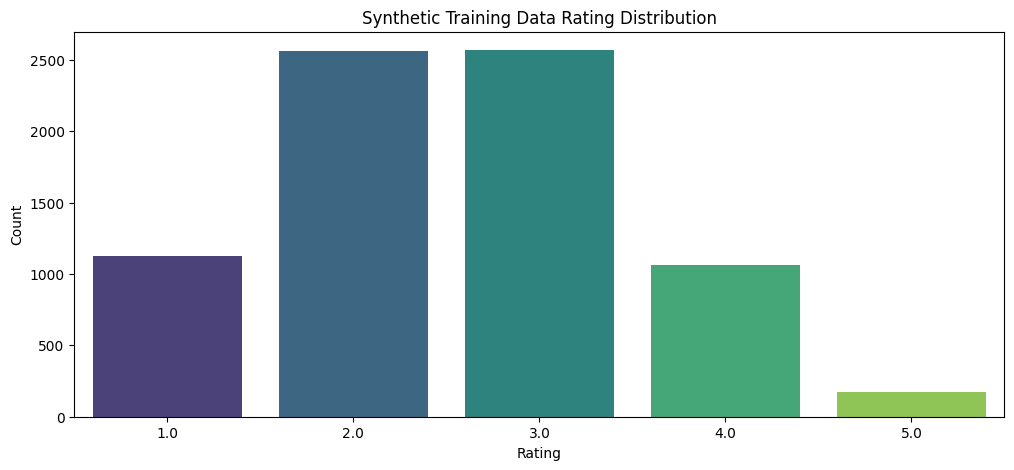

/var/folders/z9/y1zmbc2500578321lpfyjq1r0000gn/T/ipykernel_18808/3256207224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


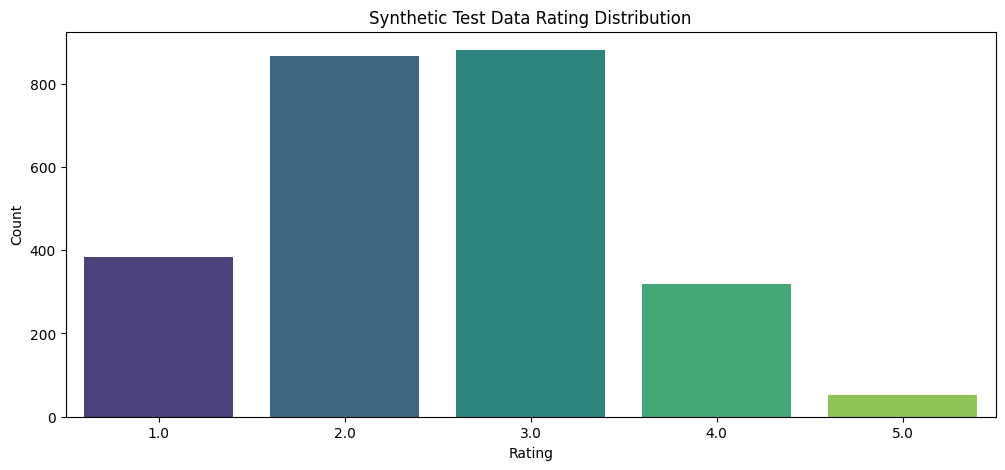

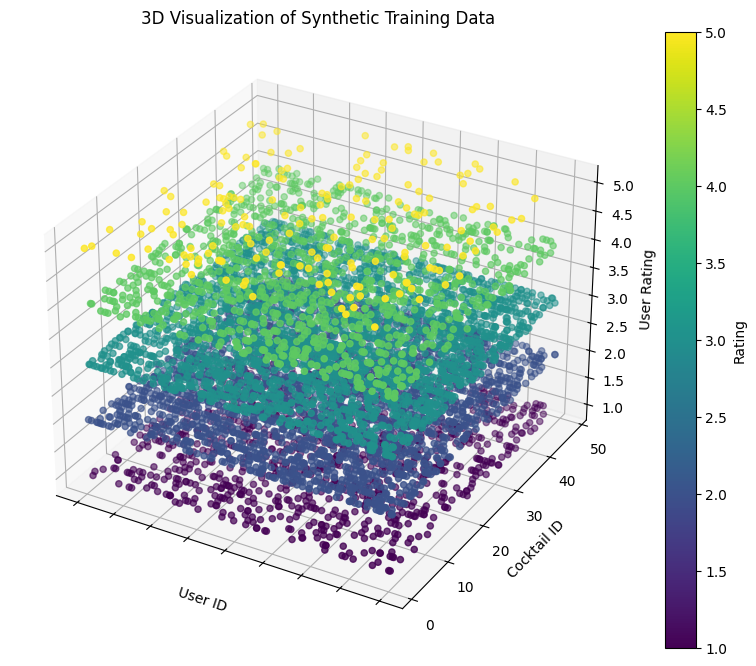

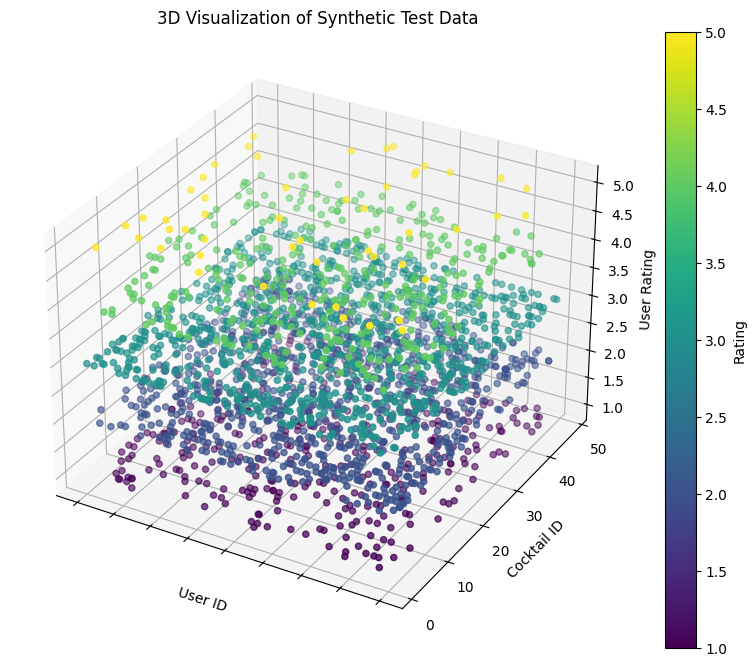

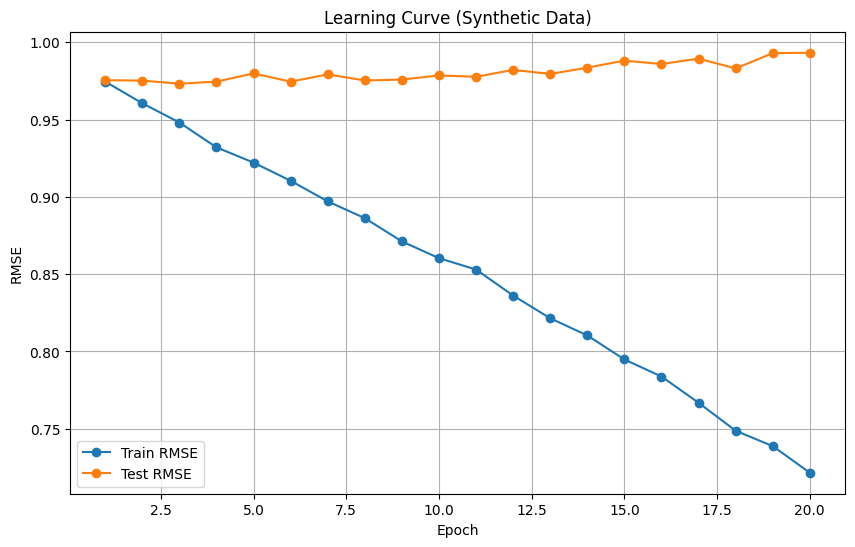

In [279]:

# Function to plot the distribution of ratings
def plot_rating_distribution(df, title):
    plt.figure(figsize=(12, 5))
    rating_counts = df['user_rating'].value_counts().sort_index()
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Function to calculate RMSE for train and test sets
def calculate_rmse(trainset, testset, n_epochs=20):
    train_rmse = []
    test_rmse = []
    
    for epoch in range(1, n_epochs + 1):
        algo = SVD(n_epochs=epoch)
        algo.fit(trainset)
        
        train_predictions = algo.test(trainset.build_testset())
        test_predictions = algo.test(testset)
        
        train_rmse.append(accuracy.rmse(train_predictions, verbose=False))
        test_rmse.append(accuracy.rmse(test_predictions, verbose=False))
    
    return train_rmse, test_rmse

# Function to plot 3D data
def plot_3d_data(data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(data['user_id'].astype(int), data['cocktail_id'].astype(int), data['user_rating'], c=data['user_rating'], cmap='viridis')
    ax.set_xlabel('User ID')
    ax.set_ylabel('Cocktail ID')
    ax.set_zlabel('User Rating')
    ax.set_title(title)
    plt.colorbar(sc, ax=ax, label='Rating')
    
    # Hide x-axis tick labels
    ax.set_xticklabels([])
    
    plt.savefig(f'images/{title}.png')
    plt.show()

# Function to process the dataset and perform analysis
def process_and_analyze(ratings_df, dataset_name):
    # Prepare the data for surprise
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(ratings_df[['user_id', 'cocktail_id', 'user_rating']], reader)

    # Train-test split
    trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

    # Convert the trainset and testset to DataFrames for plotting
    train_df = pd.DataFrame(trainset.build_testset(), columns=['user_id', 'cocktail_id', 'user_rating'])
    test_df = pd.DataFrame(testset, columns=['user_id', 'cocktail_id', 'user_rating'])

    # Plot the distribution of ratings
    plot_rating_distribution(train_df, f'{dataset_name} Training Data Rating Distribution')
    plot_rating_distribution(test_df, f'{dataset_name} Test Data Rating Distribution')

    # Plot 3D data
    plot_3d_data(train_df, f'3D Visualization of {dataset_name} Training Data')
    plot_3d_data(test_df, f'3D Visualization of {dataset_name} Test Data')
    
    # Calculate RMSE for 20 epochs
    n_epochs = 20
    train_rmse, test_rmse = calculate_rmse(trainset, testset, n_epochs)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_epochs + 1), train_rmse, marker='o', label='Train RMSE')
    plt.plot(range(1, n_epochs + 1), test_rmse, marker='o', label='Test RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(f'Learning Curve ({dataset_name} Data)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Process and analyze real data
process_and_analyze(ratings_df, 'Real')

# Process and analyze synthetic data
process_and_analyze(syn_ratings_df2, 'Synthetic')


### Feature Importance

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Merge the cocktails data with the ratings data on cocktail name
merged_df = ratings_df.merge(cocktails_df, left_on='cocktail_name', right_on='Name')

# Prepare the data for feature importance calculation
# Use user_rating as the target variable
X = merged_df.drop(columns=['user_rating', 'Name', 'cocktail_name', 'user_id'])
y = merged_df['user_rating']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Pipeline with preprocessing and random forest regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Perform permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=42, n_jobs=2)

# Extract feature importances and feature names
importances = result.importances_mean
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Combine the feature names and importances into a DataFrame
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Print the top 10 important features
print(feature_importances.head(10))



                             feature  importance
51                   num__Juice_Lime    0.021645
7                         num__Sweet    0.008618
52   num__Juice_Lime_10/Cranberry_10    0.003634
105                  num__Taste_Mild    0.003130
106                num__Taste_Strong    0.003011
0                   num__cocktail_id    0.002420
8                         num__Spicy    0.001706
60              num__Juice Amount_15    0.001592
83              num__Soda Amount_200    0.001432
99                 num__Others_Olive    0.001166


Explanation
Data Preparation:

We use the surprise library's Dataset and Reader classes to load the train, validation, and test sets.
The data is converted into a format suitable for the surprise library.
Training the Model:

We use the SVD algorithm, a popular choice for collaborative filtering.
The model is trained on the full training set.
Evaluating the Model:

We use the validation set to tune the model and compute the RMSE (Root Mean Squared Error) to check the model's performance.
Finally, we evaluate the model on the test set and compute the RMSE to assess its generalization performance.
This approach ensures that the collaborative filtering model is trained on the training set, tuned on the validation set, and evaluated on the test set, providing a robust assessment of its performance.

#### Random Search for Hyperparameter Tuning

Analysis
Training RMSE:

The training RMSE decreases steadily over the epochs, indicating that the model continues to improve its fit to the training data. By the 20th epoch, the training RMSE has decreased significantly.
Validation RMSE:

The validation RMSE starts relatively high and remains fairly constant with minor fluctuations. This indicates that the model's performance on the validation set is not improving significantly over time.
Interpretation
Overfitting:
The decreasing training RMSE and relatively constant validation RMSE indicate that the model is overfitting. The model is learning the training data well, but this is not translating to improved performance on the validation set.
The training error continues to decrease, but the validation error does not follow the same trend, which suggests that the model is memorizing the training data rather than generalizing from it.

<!-- https://beckernick.github.io/matrix-factorization-recommender/ -->

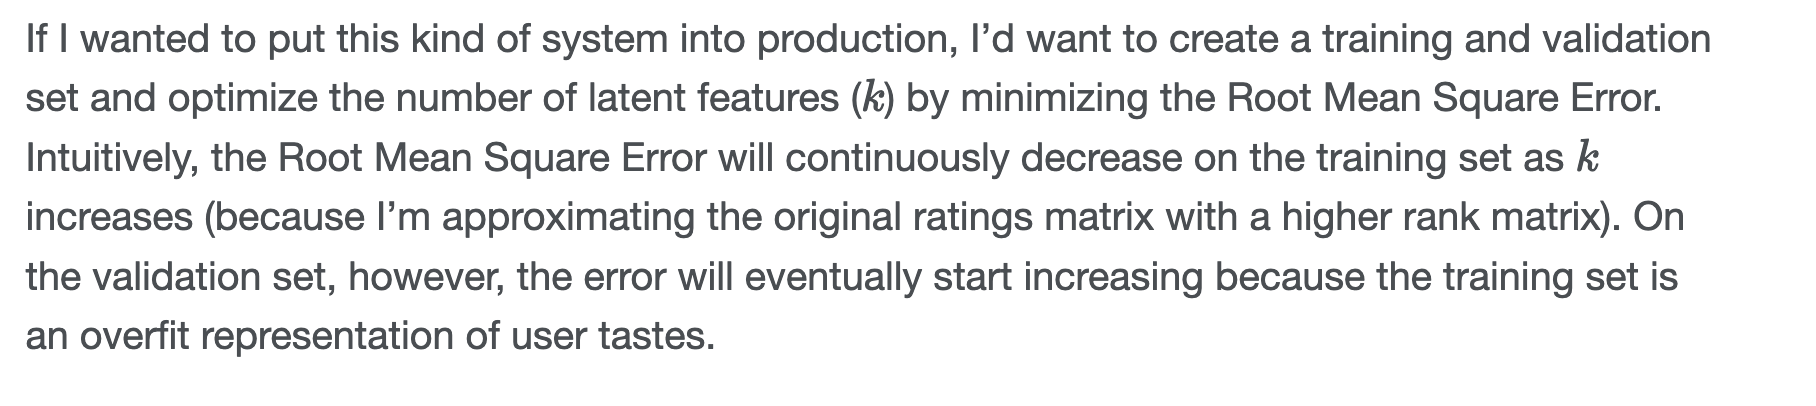



In [ ]:
# from pptx import Presentation
# from pptx.util import Inches

# # Create a presentation object
# prs = Presentation()

# # Slide 1: Title Slide
# slide_layout = prs.slide_layouts[0]
# slide = prs.slides.add_slide(slide_layout)
# title = slide.shapes.title
# subtitle = slide.placeholders[1]
# title.text = "Cocktails Recommendation System"
# subtitle.text = "Using Machine Learning to Suggest Cocktails\nPresented By: [Your Name]\nDate: [Today's Date]"

# # Slide 2: Problem Statement
# slide_layout = prs.slide_layouts[1]
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Problem Statement"
# content.text = "- Briefly describe the problem.\n- Importance of a recommendation system for cocktails.\n- Objective of the project."

# # Slide 3: Assumptions and Hypotheses
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Assumptions and Hypotheses"
# content.text = "- Assumptions about user preferences.\n- Hypotheses about how users' ratings are distributed.\n- Expected outcome from the recommendation model."

# # Slide 4: Exploratory Data Analysis
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Exploratory Data Analysis"
# content.text = "- Initial observations from the data.\n- Visualizations (distributions, correlations, etc.).\n- Key insights from the data."

# # Slide 5: Feature Engineering & Transformations
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Feature Engineering & Transformations"
# content.text = "- Description of feature engineering steps.\n- Transformations applied to the data.\n- Rationale behind the chosen features and transformations."

# # Slide 6: Proposed Approaches (Model)
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Proposed Approaches (Model)"
# content.text = "- Description of the models tried (SVD, RandomForest, etc.).\n- Cross-validation techniques used.\n- Checks for overfitting and underfitting."

# # Slide 7: Model Selection
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Model Selection"
# content.text = "- Final model chosen.\n- Regularization techniques applied.\n- Justification for the model choice."

# # Slide 8: Results and Learnings
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Results and Learnings"
# content.text = "- Accuracy metrics (RMSE, MAE, etc.).\n- Learning curves.\n- Key findings and learnings from the project."

# # Slide 9: Future Work
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Future Work"
# content.text = "- Potential improvements.\n- Future directions for the project.\n- Other models or techniques to explore."

# # Slide 10: Questions & Answers
# slide = prs.slides.add_slide(slide_layout)
# title, content = slide.shapes.title, slide.placeholders[1]
# title.text = "Questions & Answers"
# content.text = "Open floor for questions.\nThank the audience for their attention."

# # Save the presentation
# prs.save('Cocktails_Recommendation_Presentation.pptx')
